In [1]:
import numpy as np
from TDD2.TDD import Ini_TDD,Clear_TDD,set_index_order,get_tdd
from TDD2.TDD_Q import cir_2_tn,get_real_qubit_num,add_trace_line,add_inputs,add_outputs
from TDD2.TDD_Q import reshape as reshape2
from TDD2.TN import Index,Tensor,TensorNetwork
import time
import random
from qiskit import QuantumCircuit
from sympy import *
from sympy.parsing.sympy_parser import parse_expr
from TDD2.TDD import get_unique_table_num as gu1
from TDD2.BMD2 import get_unique_table_num as gu2
from TDD2.BMD2 import add
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\qiskit\__init__.py:64: RuntimeWarning: Could not import the Aer provider from the qiskit-aer package. Install qiskit-aer or check your installation.
  RuntimeWarning)


0.08795928955078125
5
175


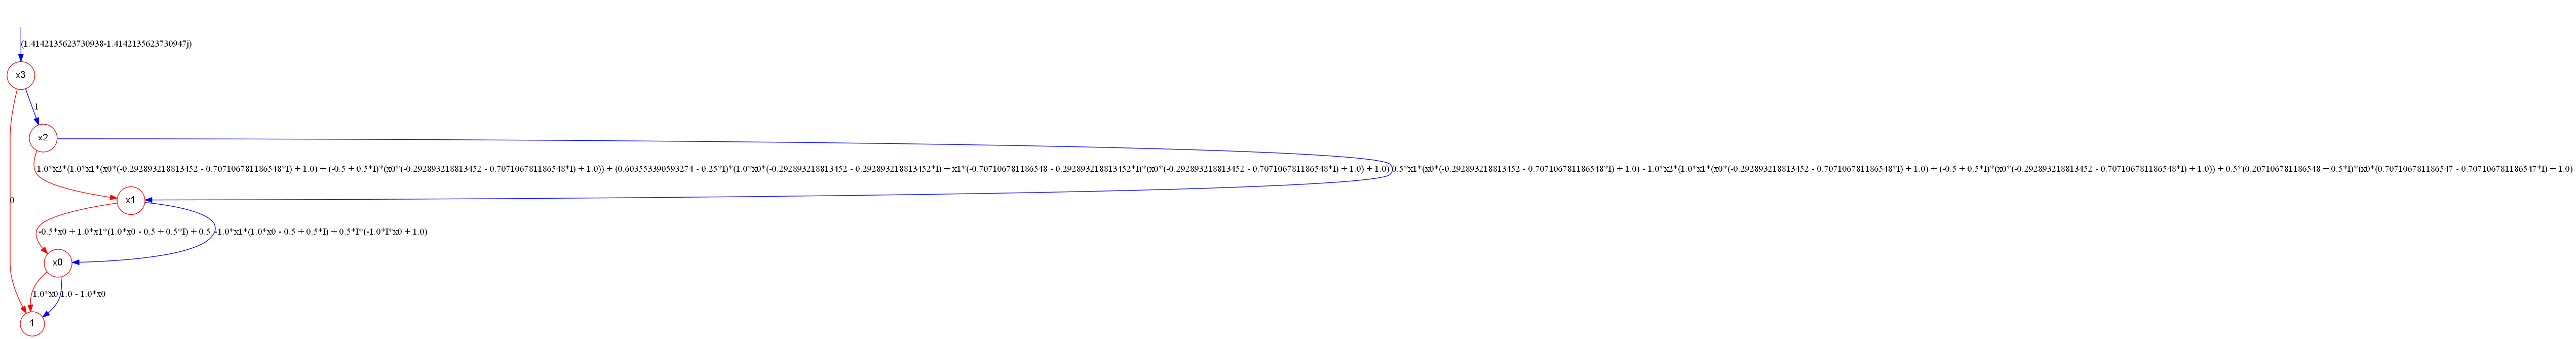

In [71]:
path='Benchmarks/'
n=4
t_start=time.time()
file_name='PEE_'+str(n-1)+'.qasm'
# file_name='grover_'+str(n)+'.qasm'
cir=QuantumCircuit.from_qasm_file(path+file_name)
tn,indices=cir_2_tn(cir)
# for k in range(n-1):
#     x_k='x'+str(k)
#     xn_k='xn'+str(k)
#     s=Symbol(x_k)
#     ns=Symbol(xn_k)
#     U=np.array([ns,s])
# #     U=np.array([1,0])
#     temp_ts=Tensor(U,[Index(x_k)])
#     tn.tensors.insert(0,temp_ts)
#     if not x_k in indices:
#         indices.append(x_k)
        
# x_k='x'+str(n-1)        
# U=np.array([0,1])
# temp_ts=Tensor(U,[Index(x_k)])
# tn.tensors.insert(0,temp_ts)
# if not x_k in indices:
#     indices.append(x_k)


for k in range(n-1):
    x_k='x'+str(k)
    xn_k='xn'+str(k)
    s=Symbol(x_k)
    ns=Symbol(xn_k)
    U=np.array([ns,s])
#     U=np.array([1,0])
    temp_ts=Tensor(U,[Index('y'+str(k))])
    tn.tensors.append(temp_ts)
    if not x_k in indices:
        indices.append(x_k)
             
U=np.array([0,1])
temp_ts=Tensor(U,[Index('y'+str(n-1) )])
tn.tensors.insert(0,temp_ts)

tn.tensors.reverse()

indices.reverse()
Ini_TDD(indices)
tdd=tn.cont()
print(time.time()-t_start)
print(tdd.node_number())
print(gu1()+gu2())
# print(gu2())
tdd.show()

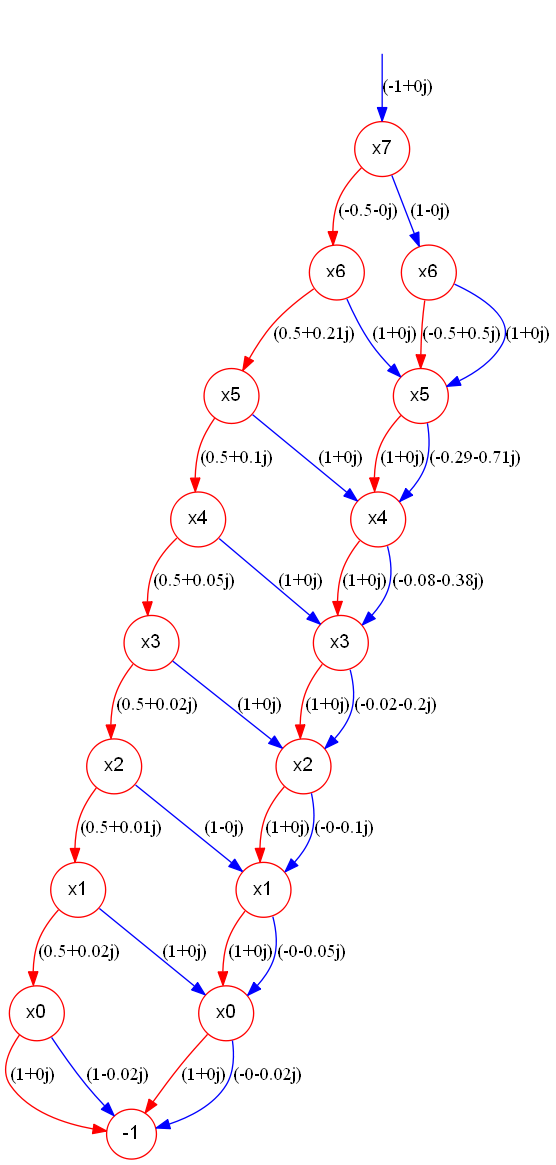

In [66]:
bdd=tdd.node.successor[1].out_weight[1]
# bdd=tdd.weight
bdd.show()

0.20099472999572754
5


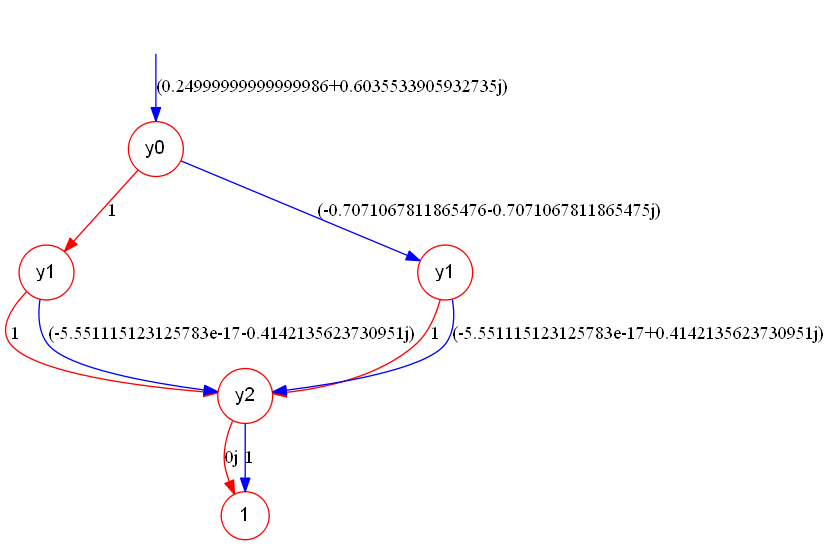

In [17]:
path='Benchmarks/'
n=3
t_start=time.time()
file_name='pe_'+str(n)+'_2.qasm'
cir=QuantumCircuit.from_qasm_file(path+file_name)
tn,indices=cir_2_tn(cir)
for k in range(n-1):
    x_k='x'+str(k)
    xn_k='xn'+str(k)
    s=Symbol(x_k)
    ns=Symbol(xn_k)
#     U=np.array([ns,s])
    U=np.array([1,0])
    temp_ts=Tensor(U,[Index(x_k)])
    tn.tensors.insert(0,temp_ts)
    if not x_k in indices:
        indices.append(x_k)
x_k='x'+str(n-1)        
U=np.array([0,1])
temp_ts=Tensor(U,[Index(x_k)])
tn.tensors.insert(0,temp_ts)
if not x_k in indices:
    indices.append(x_k)
        
Ini_TDD(indices)
tdd=tn.cont()
print(time.time()-t_start)
print(tdd.node_number())
# print(gu1())
# print(gu2())
tdd.show()

15
1


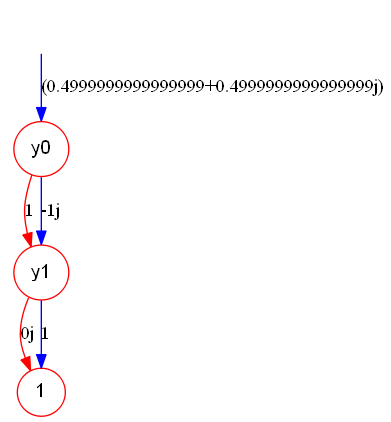

In [18]:
n=2

H=1/np.sqrt(2)*np.array([[1,1],[1,-1]])

CU=np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,exp(pi/2*I)]])
CU=reshape2(CU)

tn=TensorNetwork([])

#add initial
k0=np.array([1,0])
for k in range(n-1):
    var=[Index('x'+str(k))]
    ts=Tensor(k0,var)
    tn.tensors.append(ts)
    
k1=np.array([0,1])    
var=[Index('x'+str(1))]
ts=Tensor(k1,var)
tn.tensors.append(ts)    
    
#add H gate
var=[Index('x'+str(0)),Index('x'+str(0)+'_1')]
ts=Tensor(H,var)
tn.tensors.append(ts)


# add CU gate
var=[Index('x0_1'),Index('x0_2'),Index('x1'),Index('y1')]
ts=Tensor(CU,var)
tn.tensors.append(ts)  


#add H gate
var=[Index('x0_2'),Index('y0')]
ts=Tensor(H,var)
tn.tensors.append(ts)
    

var=[]
for k in range(n):
    var.append('x'+str(k))
    for k1 in range(7):
        var.append('x'+str(k)+'_'+str(k1))
    var.append('y'+str(k))
    
Ini_TDD(var,['s1','s0'])
    
tdd=tn.cont()
print(gu1())
print(gu2())
tdd.show()

17
5


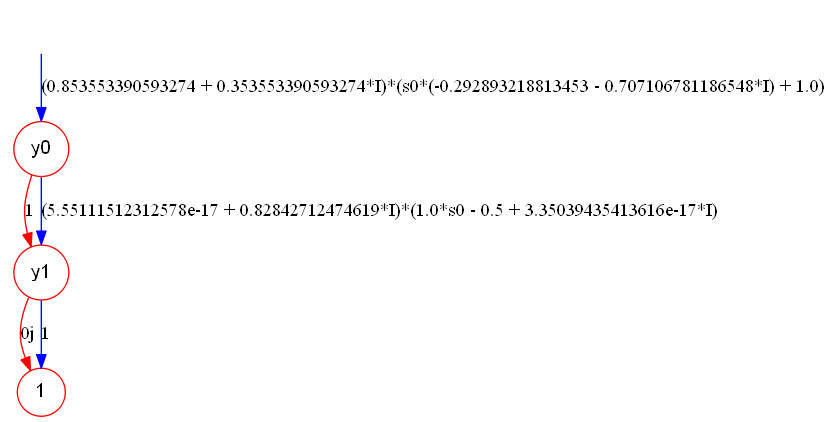

In [19]:
n=2
s0=symbols('s0')
sn0=symbols('sn0')
S0=np.array([[1,0],[0,sn0-I*s0]])
H=1/np.sqrt(2)*np.array([[1,1],[1,-1]])

CU=np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,exp(pi/4*I)]])
CU=reshape2(CU)

tn=TensorNetwork([])

#add initial
k0=np.array([1,0])
for k in range(n-1):
    var=[Index('x'+str(k))]
    ts=Tensor(k0,var)
    tn.tensors.append(ts)
    
k1=np.array([0,1])    
var=[Index('x'+str(1))]
ts=Tensor(k1,var)
tn.tensors.append(ts)    
    
#add H gate
var=[Index('x'+str(0)),Index('x'+str(0)+'_1')]
ts=Tensor(H,var)
tn.tensors.append(ts)


# add CU gate
var=[Index('x0_1'),Index('x0_2'),Index('x1'),Index('y1')]
ts=Tensor(CU,var)
tn.tensors.append(ts)  

#add S^s gate
var=[Index('x0_2'),Index('x0_3')]
ts=Tensor(S0,var)
tn.tensors.append(ts)

#add H gate
var=[Index('x0_3'),Index('y0')]
ts=Tensor(H,var)
tn.tensors.append(ts)
    

var=[]
for k in range(n):
    var.append('x'+str(k))
    for k1 in range(7):
        var.append('x'+str(k)+'_'+str(k1))
    var.append('y'+str(k))
    
Ini_TDD(var,['s1','s0'])
    
tdd=tn.cont()
print(gu1())
print(gu2())
tdd.show()

21
46


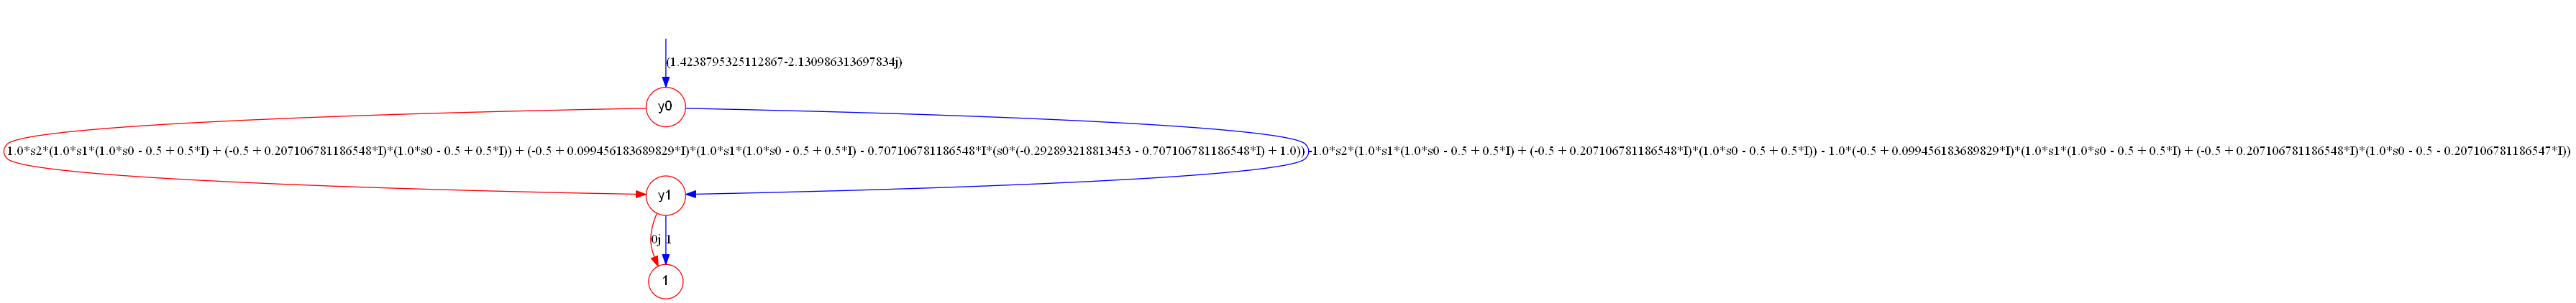

In [67]:
n=2
s0=symbols('s0')
sn0=symbols('sn0')
S0=np.array([[1,0],[0,sn0-I*s0]])

s1=symbols('s1')
sn1=symbols('sn1')
S1=np.array([[1,0],[0,sn1-exp(pi/4*I)*s1]])

s2=symbols('s2')
sn2=symbols('sn2')
S2=np.array([[1,0],[0,sn2-exp(pi/8*I)*s2]])

H=1/np.sqrt(2)*np.array([[1,1],[1,-1]])

CU=np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,exp(pi/4*I)]])
CU=reshape2(CU)

tn=TensorNetwork([])

#add initial
k0=np.array([1,0])
for k in range(n-1):
    var=[Index('x'+str(k))]
    ts=Tensor(k0,var)
    tn.tensors.append(ts)
    
k1=np.array([0,1])    
var=[Index('x'+str(1))]
ts=Tensor(k1,var)
tn.tensors.append(ts)    
    
#add H gate
var=[Index('x'+str(0)),Index('x'+str(0)+'_1')]
ts=Tensor(H,var)
tn.tensors.append(ts)


# add CU gate
var=[Index('x0_1'),Index('x0_2'),Index('x1'),Index('y1')]
ts=Tensor(CU,var)
tn.tensors.append(ts)  

#add S^s gate
var=[Index('x0_2'),Index('x0_3')]
ts=Tensor(S0,var)
tn.tensors.append(ts)

var=[Index('x0_3'),Index('x0_4')]
ts=Tensor(S1,var)
tn.tensors.append(ts)

var=[Index('x0_4'),Index('x0_5')]
ts=Tensor(S2,var)
tn.tensors.append(ts)

# add H gate
var=[Index('x0_5'),Index('y0')]
ts=Tensor(H,var)
tn.tensors.append(ts)
    

var=[]
for k in range(n):
    var.append('x'+str(k))
    for k1 in range(7):
        var.append('x'+str(k)+'_'+str(k1))
    var.append('y'+str(k))
    
syms=['s2','s1','s0']
# syms.reverse()
Ini_TDD(var,syms)
    
tdd=tn.cont()
print(gu1())
print(gu2())
tdd.show()

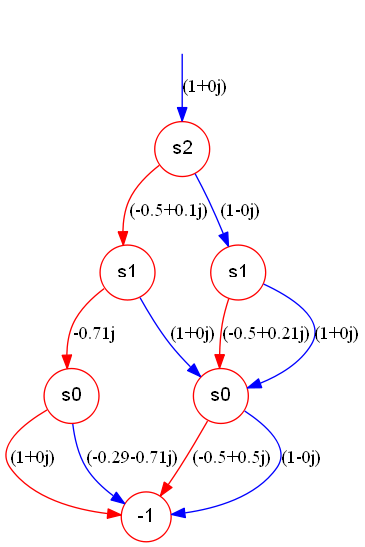

In [69]:
bdd=tdd.node.out_weight[0]
# bdd=tdd.weight
bdd.show()